Fake News = 1    
True News = 0

Le fichier "News.csv" contient les articles pret a entrainer par le modele

In [ ]:
from google.colab import files
import pandas as pd



News = pd.read_csv("News.csv")


# News = News.drop(columns=['url', 'snippet', 'pub_date'])

News.head()


,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


label
1    6996
0    5524
Name: count, dtype: int64


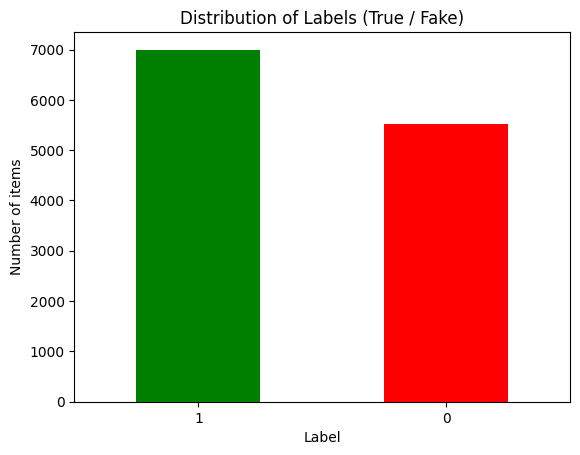

In [ ]:
import matplotlib.pyplot as plt

# Comptage des occurrences des labels
label_counts = News['label'].value_counts()
print(label_counts)
# Visualisation sous forme de graphique à barres
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Labels (True / Fake)')
plt.xlabel('Label')
plt.ylabel('Number of items')
plt.xticks(rotation=0)
plt.show()


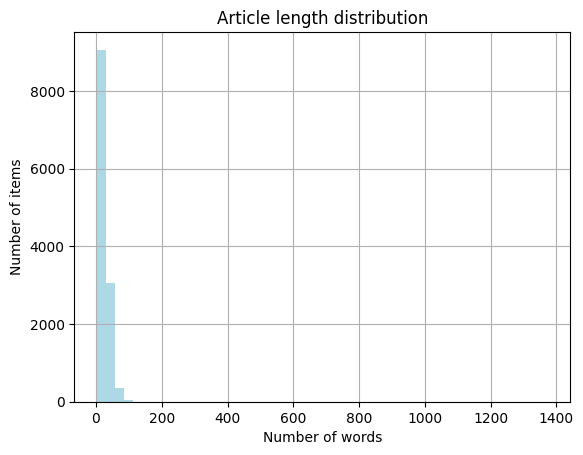

In [ ]:
# Calculer la longueur de chaque article (en nombre de mots)
News['text_length'] = News['text'].apply(lambda x: len(x.split()))

# Visualisation sous forme d'histogramme
News['text_length'].hist(bins=50, color='lightblue')
plt.title('Article length distribution')
plt.xlabel('Number of words')
plt.ylabel('Number of items')
plt.show()


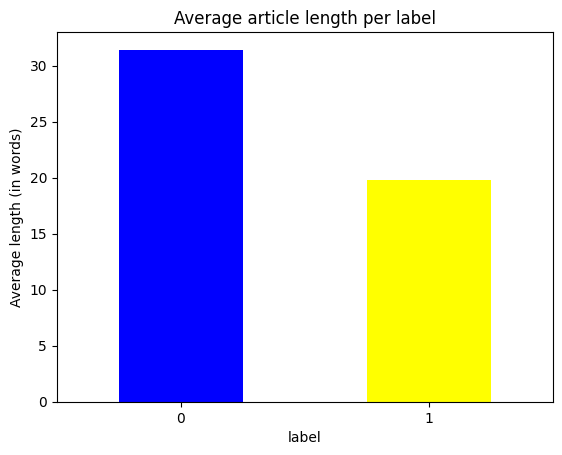

In [ ]:
# Calculer la longueur des articles par label
News['text_length'] = News['text'].apply(lambda x: len(x.split()))
News.groupby('label')['text_length'].mean().plot(kind='bar', color=['blue', 'yellow'])
plt.title('Average article length per label')
plt.ylabel('Average length (in words)')
plt.xticks(rotation=0)
plt.show()


Cette fonction permet de netoyer le text pour les vrais news

In [ ]:
import re

def clean_textTrueNews(text):
  if not isinstance(text, str):
      return ""
  text = re.sub(r'<[^>]+>', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = text.lower()
  return text.strip()

News['lead_paragraph'] = News['lead_paragraph'].apply(clean_textTrueNews)
News.head()

,title,lead_paragraph
0,Africa Calling,this article is also a weekly newsletter sign ...
1,"East Africa's Loss, South Africa's Gain",the number of american visitors to south afric...
2,All of Africa’s a Stage,assassinating shakespeare
3,AFRICAN GOLD DEAL,in a move to expand its operations into countr...
4,South Africa's Gilding; South Africa,


Cette fonction permet de netoyer le text pour les faux news

In [ ]:
import pandas as pd
import re


def clean_textFakeNews(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r"\[\"|\"\]", "", text)
    # Étape 1 : Extraction des textes entre guillemets
    quotes = re.findall(r'"(.*?)"|“(.*?)”', text)
    if quotes:
        extracted_texts = [''.join(q) for q in quotes]
        text = ' '.join(extracted_texts).strip()
    else:
        return ""

    # Étape 2 : Suppressions progressives
    text = re.sub(r'<[^>]+>', '', text)  # Supprimer balises HTML
    text = re.sub(r'http\S+', '', text)  # Supprimer URLs
    text = re.sub(r'@\w+', '', text)     # Supprimer mentions
    text = re.sub(r'#\w+', '', text)     # Supprimer hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Conserver lettres, chiffres et espaces
    text = re.sub(r'\s+', ' ', text)  # Réduire espaces multiples
    text = text.lower()  # Tout en minuscule

    return text.strip()

News['content'] = News['content'].apply(clean_textFakeNews)
News.head()


,title,content
0,Walz targeted by misleading Minnesota flag des...,walz changed his states sic flag to look exact...
1,Tim Walz did not sign Minnesota law protecting...,last february the state of minnesota governor ...
2,Jasper National Park wildfire reignites direct...,was jasper devastation caused by a dew
3,Chinese posts falsely claim US Olympic swimmer...,behind american walshs 0 tests god knows how m...
4,Image of Trump surrounded by Black women is fa...,they are afraid of black women supporting trum...


Nettoyer le Titre

In [ ]:
def clean_titleFakeNews(text):
  custom_words = set(["false", "misleading", "altered"])
  if not isinstance(text, str):  # Vérifie si la valeur est une chaîne
    return ""
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = text.lower()
  text = ' '.join([word for word in text.split() if len(word) > 3])
  text = ' '.join([word for word in text.split() if word.lower() not in custom_words])

  lettres_repete = r'\b\w*([a-zA-Z])\1{2,}\w*\b'
  text = re.sub(lettres_repete, '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

News['title'] = News['title'].apply(clean_titleFakeNews)
News.head()


,title
0,video shows pakistan police heating women lini...
1,ukrainian prosecutors sonin sear monaco
2,video shows indonesian party chairman skydiving
3,first president visit restive province inthe p...
4,video shows taylor swift travis kelce falling ...


Pour combiner les deux datasets

In [ ]:


fakeS['label'] = 1
TNews = pd.DataFrame()
TNews['text'] = trueS['titre'].str.cat(trueS['contenu'], sep=' ', na_rep='')
TNews['label'] = 0
selectColumns = fakeS[['contenu', 'label']]
selectColumns = selectColumns.rename(columns={'contenu': 'text'})
News = pd.concat([TNews, selectColumns], ignore_index=True)
News = News[News['text'].str.len() > 50]
fakeS = fakeS.dropna(subset=['contenu'])


(9222, 2)

supprimer les mots vides

In [ ]:


from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

News['lead_paragraph'] = News['lead_paragraph'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)
News = News.reset_index(drop=True)

News.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,lead_paragraph
0,Africa Calling,article also weekly newsletter sign racerelated
1,"East Africa's Loss, South Africa's Gain",number american visitors south africa dropped ...
2,All of Africa’s a Stage,assassinating shakespeare
3,AFRICAN GOLD DEAL,move expand operations countries lower operati...
4,South Africa's Gilding; South Africa,


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


La tokenisation et la lemmatisation

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Traitez le texte avec spaCy, cela effectue la tokenisation et la lemmatisation
    doc = nlp(text)
    # Retourne la chaîne lemmatisée en un seul passage
    return " ".join([token.lemma_ for token in doc])

News['lead_paragraph'] = News['lead_paragraph'].apply(clean_titleFakeNews)
News.head()
# print(News['label'].value_counts())
# News.shape

,title,lead_paragraph
0,Africa Calling,article also weekly newsletter sign racerelated
1,"East Africa's Loss, South Africa's Gain",number american visitors south africa dropped ...
2,All of Africa’s a Stage,assassinating shakespeare
3,AFRICAN GOLD DEAL,move expand operations countries lower operati...
4,South Africa's Gilding; South Africa,


Afficher la distribution des classes

<ipython-input-133-34725b1f160a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=News, palette='Set2')


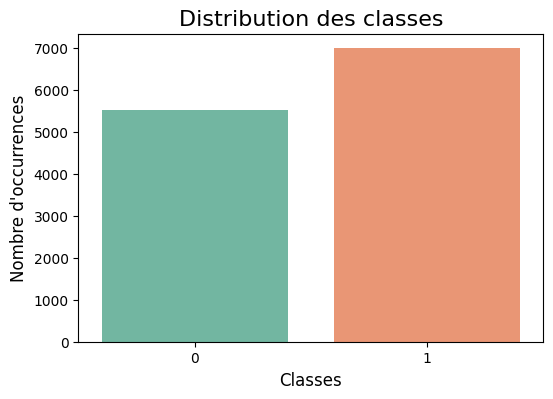

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=News, palette='Set2')
plt.title('Distribution des classes', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.xticks(rotation=0)
plt.show()




Diviser les donnees  ( 80% train et 20% test )

In [ ]:
from sklearn.model_selection import train_test_split

X = News['text']
y = News['label']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Text vectorization ( TF-IDF )

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()


xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exemple de corpus
corpus = [
    "The quick brown fox.",
    "The lazy dog jumped over the quick brown fox.",
    "A quick fox and a lazy dog."
]

# Initialiser le TfidfVectorizer
vectorization = TfidfVectorizer()

# Appliquer TF-IDF à l'ensemble d'entraînement
xv_train = vectorization.fit_transform(X)

# Convertir la matrice résultante en DataFrame pour une meilleure lisibilité
import pandas as pd
tfidf_df = pd.DataFrame(xv_train.toarray(), columns=vectorization.get_feature_names_out())

pd.set_option('display.max_rows', 5)  # Limite le nombre de lignes à afficher
pd.set_option('display.max_columns', 15)
# Afficher la matrice TF-IDF
print(tfidf_df.head())


   000  0000  000000  001  0038  004   01  ...  zumbi  zurich  zurmi  zyad  \
0  0.0   0.0     0.0  0.0   0.0  0.0  0.0  ...    0.0     0.0    0.0   0.0   
1  0.0   0.0     0.0  0.0   0.0  0.0  0.0  ...    0.0     0.0    0.0   0.0   
2  0.0   0.0     0.0  0.0   0.0  0.0  0.0  ...    0.0     0.0    0.0   0.0   
3  0.0   0.0     0.0  0.0   0.0  0.0  0.0  ...    0.0     0.0    0.0   0.0   
4  0.0   0.0     0.0  0.0   0.0  0.0  0.0  ...    0.0     0.0    0.0   0.0   

   zyakhala  zygmunt  zyl  
0       0.0      0.0  0.0  
1       0.0      0.0  0.0  
2       0.0      0.0  0.0  
3       0.0      0.0  0.0  
4       0.0      0.0  0.0  

[5 rows x 33176 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re  # Pour utiliser les expressions régulières

# Exemple de corpus
corpus = [
    "The quick brown fox 2.",
    "The lazy dog jumped over the quick brown fox 3.",
    "A quick fox and a lazy dog."
]

# Initialiser le TfidfVectorizer
vectorization = TfidfVectorizer()

# Appliquer TF-IDF à l'ensemble du corpus
xv_train = vectorization.fit_transform(X)

# Convertir la matrice résultante en DataFrame pour une meilleure lisibilité
tfidf_df = pd.DataFrame(xv_train.toarray(), columns=vectorization.get_feature_names_out())

# Nettoyer les noms des colonnes (supprimer les chiffres dans les noms de colonnes)
# Utilisation de l'expression régulière pour remplacer les chiffres par des underscores (ou autre format)
tfidf_df.columns = [re.sub(r'\d+', '', col) for col in tfidf_df.columns]

# Limiter l'affichage du nombre de lignes et de colonnes
pd.set_option('display.max_rows', 10)  # Limite le nombre de lignes à afficher
pd.set_option('display.max_columns', 10)  # Limite le nombre de colonnes à afficher

# Afficher la matrice TF-IDF nettoyée
print(tfidf_df.head(10))


                            ...  zurmi  zyad  zyakhala  zygmunt  zyl
0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
8  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0
9  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0      0.0  0.0

[10 rows x 33176 columns]


La regression Logistique

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression(max_iter = 1000)
grid = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)
grid.fit(xv_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
print("best :", grid.best_params_)

best : {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000)

LR.fit(xv_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [ ]:
pred_lr = LR.predict(xv_test)
pred_lr_train = LR.predict(xv_train)

In [ ]:
print(LR.score(xv_test, y_test))
print(LR.score(xv_train, y_train))

0.9233226837060703
0.9690495207667732


Classification report

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred_lr))
print(classification_report(y_train, pred_lr_train))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1127
           1       0.91      0.95      0.93      1377

    accuracy                           0.92      2504
   macro avg       0.93      0.92      0.92      2504
weighted avg       0.92      0.92      0.92      2504

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4397
           1       0.96      0.98      0.97      5619

    accuracy                           0.97     10016
   macro avg       0.97      0.97      0.97     10016
weighted avg       0.97      0.97      0.97     10016



Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_lr))

[[1001  126]
 [  66 1311]]


La classification bayesienne

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.5, 1, 2.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='f1', cv=10)
grid_search.fit(xv_train, y_train)


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.5, 1, 2.0, 5.0]}, scoring='f1')

In [ ]:
print("best alpha: ", grid_search.best_params_)

best alpha:  {'alpha': 0.5}


Entrainer le modele

In [ ]:
NB = MultinomialNB(alpha=0.5)
NB.fit(xv_train, y_train)

MultinomialNB(alpha=0.5)

In [ ]:
NB_predictionTest = NB.predict(xv_test)
NB_predictionTrain = NB.predict(xv_train)

In [ ]:
print(NB.score(xv_test, y_test))
print(NB.score(xv_train, y_train))

0.922923322683706
0.9791333865814696


In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, NB_pre))
print(classification_report(y_train, pred_lr_train))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1127
           1       0.92      0.94      0.93      1377

    accuracy                           0.92      2504
   macro avg       0.92      0.92      0.92      2504
weighted avg       0.92      0.92      0.92      2504



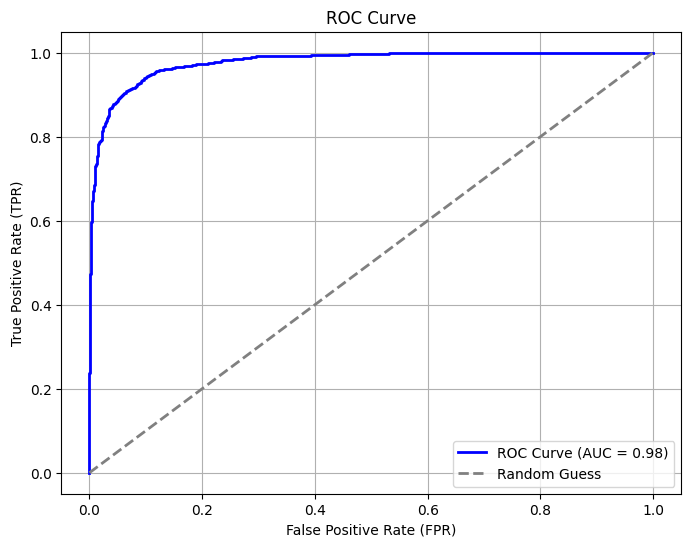

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités pour la classe positive
y_prob = NB.predict_proba(xv_test)[:, 1]

# Calculer le Taux de Faux Positifs (FPR) et de Vrais Positifs (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


L'arbre de decision

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params_grid = {'max_depth': range(150, 200),
               'min_samples_split': [200, 300],
               'min_samples_leaf': [5],
               'max_leaf_nodes': [200, 300],
               'min_impurity_decrease': [0.0001, 0.001, 0.01]
               }

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=4), params_grid, n_iter=100, scoring='f1', cv=10, n_jobs=-1)
random_search.fit(xv_train, y_train)


KeyboardInterrupt: 

In [ ]:
print("best params: ", random_search.best_params_)

NameError: name 'random_search' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=172, min_samples_split=200, min_samples_leaf=5, max_leaf_nodes=200, min_impurity_decrease=0.001, random_state=4)
DT.fit(xv_train, y_train)

DecisionTreeClassifier(max_depth=172, max_leaf_nodes=200,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       min_samples_split=200, random_state=4)

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
print(DT.score(xv_test, y_test))
print(DT.score(xv_train, y_train))

0.8590255591054313
0.8722044728434505


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Not A Fake News"

In [ ]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_NB = NB.predict(new_xv_test)


    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),
                                                                                                                      output_lable(pred_NB[0])))

In [ ]:
news = str(input())
manual_testing(news)

The U.S. Food and Drug Administration (FDA) has officially approved a new vaccine for COVID-19, developed by a leading pharmaceutical company. Distribution is expected to begin next week.


LR Prediction: Fake News 
DT Prediction: Not A Fake News 
NB Prediction: Fake News 


In [ ]:
News.to_csv('News.csv', index=False)
files.download('News.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>